In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import string



# Reading Datasets

In [2]:
fake = pd.read_csv("C:/Users/admin/OneDrive/Documents/Fake.csv")
true = pd.read_csv("C:/Users/admin/OneDrive/Documents/True.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_7836\1334655364.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake = pd.read_csv("C:/Users/admin/OneDrive/Documents/Fake.csv")


In [3]:
fake.shape

(23502, 172)

In [4]:
true.shape

(21417, 4)

# Data Cleaning and Preparation

In [5]:
# add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
# concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44919, 173)

In [7]:
# shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
# check the data
data.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,U.S. officials will not label treatment of Roh...,WASHINGTON (Reuters) - U.S. government officia...,worldnews,24-Oct-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
1,ONE DEMOCRAT WHO REFUSES To Cast Electoral Vot...,"Trump is going to win in a landslide, but woul...",politics,7-Nov-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
2,"OBAMA GIVES UN Authority To Vet 9,000 “Refugee...",As Obama begins his campaign for UN General Se...,politics,14-Jan-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
3,Could Newt Gingrich Save The Republican Party ...,"He d like to build a giant wall, deport illega...",politics,11-Oct-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
4,Trump Now Has An EVEN WORSE Excuse For Why He...,Donald Trump never runs out of new ways to dis...,News,17-May-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake


In [9]:
# removing unnamed columns
df = pd.DataFrame(data)
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df.head()

,title,text,subject,date,target
0,U.S. officials will not label treatment of Roh...,WASHINGTON (Reuters) - U.S. government officia...,worldnews,24-Oct-17,true
1,ONE DEMOCRAT WHO REFUSES To Cast Electoral Vot...,"Trump is going to win in a landslide, but woul...",politics,7-Nov-16,fake
2,"OBAMA GIVES UN Authority To Vet 9,000 “Refugee...",As Obama begins his campaign for UN General Se...,politics,14-Jan-16,fake
3,Could Newt Gingrich Save The Republican Party ...,"He d like to build a giant wall, deport illega...",politics,11-Oct-15,fake
4,Trump Now Has An EVEN WORSE Excuse For Why He...,Donald Trump never runs out of new ways to dis...,News,17-May-16,fake


In [10]:
df.shape

(44919, 5)

In [11]:
# removing the date
df.drop(["date"],axis=1,inplace=True)
df.head()

,title,text,subject,target
0,U.S. officials will not label treatment of Roh...,WASHINGTON (Reuters) - U.S. government officia...,worldnews,true
1,ONE DEMOCRAT WHO REFUSES To Cast Electoral Vot...,"Trump is going to win in a landslide, but woul...",politics,fake
2,"OBAMA GIVES UN Authority To Vet 9,000 “Refugee...",As Obama begins his campaign for UN General Se...,politics,fake
3,Could Newt Gingrich Save The Republican Party ...,"He d like to build a giant wall, deport illega...",politics,fake
4,Trump Now Has An EVEN WORSE Excuse For Why He...,Donald Trump never runs out of new ways to dis...,News,fake


In [12]:
# removing the title
df.drop(["title"],axis=1,inplace=True)
df.head()

,text,subject,target
0,WASHINGTON (Reuters) - U.S. government officia...,worldnews,true
1,"Trump is going to win in a landslide, but woul...",politics,fake
2,As Obama begins his campaign for UN General Se...,politics,fake
3,"He d like to build a giant wall, deport illega...",politics,fake
4,Donald Trump never runs out of new ways to dis...,News,fake


In [13]:
def lower_case(text):
    return text.lower()
    
df['text'] = df['text'].apply(lower_case)
df.head()

,text,subject,target
0,washington (reuters) - u.s. government officia...,worldnews,true
1,"trump is going to win in a landslide, but woul...",politics,fake
2,as obama begins his campaign for un general se...,politics,fake
3,"he d like to build a giant wall, deport illega...",politics,fake
4,donald trump never runs out of new ways to dis...,News,fake


In [14]:
# remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['text'] = df['text'].apply(punctuation_removal)

In [15]:
df.head()

,text,subject,target
0,washington reuters us government officials de...,worldnews,true
1,trump is going to win in a landslide but would...,politics,fake
2,as obama begins his campaign for un general se...,politics,fake
3,he d like to build a giant wall deport illegal...,politics,fake
4,donald trump never runs out of new ways to dis...,News,fake


In [16]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def stopwords_removal(text):
    stop = set(stopwords.words('english'))
    words_list = [word for word in text.split() if word not in (stop)]
    filtered_text = ''.join(words_list)
    return filtered_text

df['text'] = df['text'].apply(stopwords_removal)

# import nltk
# nltk.download('punkt')
 
# from nltk.corpus import stopwords
# # # from nltk.tokenize import word_tokenize
# def stopwords_removal(text):
#  #     text_tokens = word_tokenize(text)
#     stop = set(stopwords.words('english'))
#     words_list = [word for word in text if word not in (stop)]
#     filtered_text = ''.join(words_list)
#     return filtered_text
    
    
# df['text'] = df['text'].apply(stopwords_removal)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df.head()

,text,subject,target
0,washingtonreutersusgovernmentofficialsdeclined...,worldnews,true
1,trumpgoingwinlandslidedeliciousironyseemaleber...,politics,fake
2,obamabeginscampaignungeneralsecretaryustaxpaye...,politics,fake
3,likebuildgiantwalldeportillegalsdefundplannedp...,politics,fake
4,donaldtrumpneverrunsnewwaysdisgustoffendpeople...,News,fake


# Basic Data Exploration

subject
 Karl Marx is either a villain or a hero of social engineering                                                                                                                                                                                                                                      2
 Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"                                                                                                                                                                               1
 a future nuclear family                                                                                                                                                                                                                                                                            2
 and so is Mr. Katzenbach                                                                                     

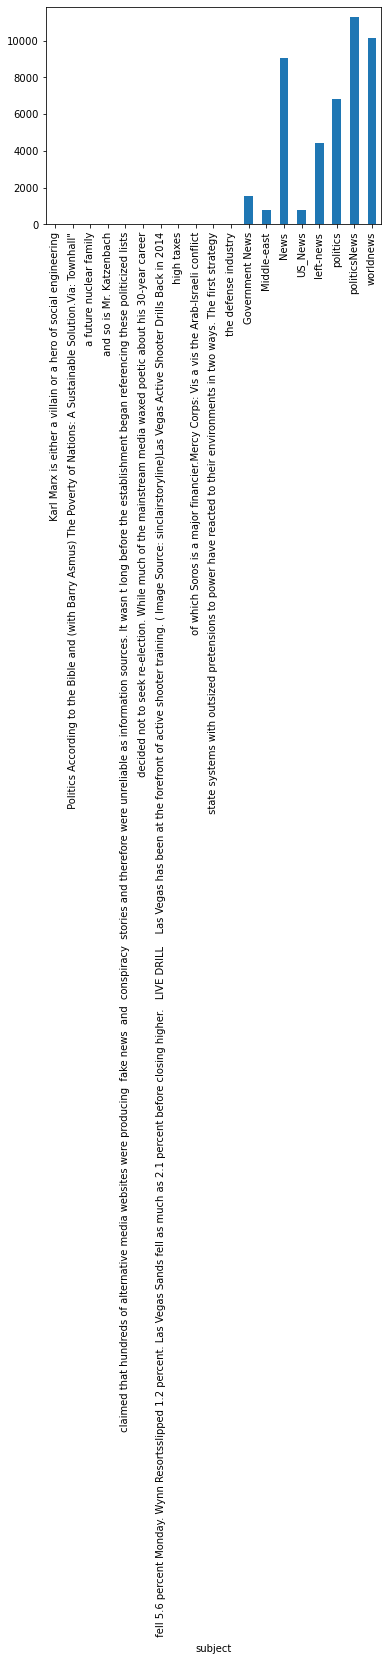

In [18]:
# How many articles per subject?
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [19]:
df.loc[:,'subject'].unique()

array(['worldnews', 'politics', 'News', 'politicsNews', 'left-news',
       'Government News', 'US_News', 'Middle-east', nan,
       ' decided not to seek re-election. While much of the mainstream media waxed poetic about his 30-year career',
       ' a future nuclear family',
       ' fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014',
       ' claimed that hundreds of alternative media websites were producing  fake news  and  conspiracy  stories and therefore were unreliable as information sources. It wasn t long before the establishment began referencing these politicized lists',
       ' Karl Marx is either a villain or a hero of social engineering',
       ' the defense industry',
       ' state systems with outsized pretensions to power have reacted 

In [20]:
df = df[df['subject'].str.contains('and so is Mr. Katzenbach', ' a future nuclear family')== False]

In [21]:
df = df[df['subject'].str.contains('Karl Marx is either a villain or a hero of social engineering')== False]

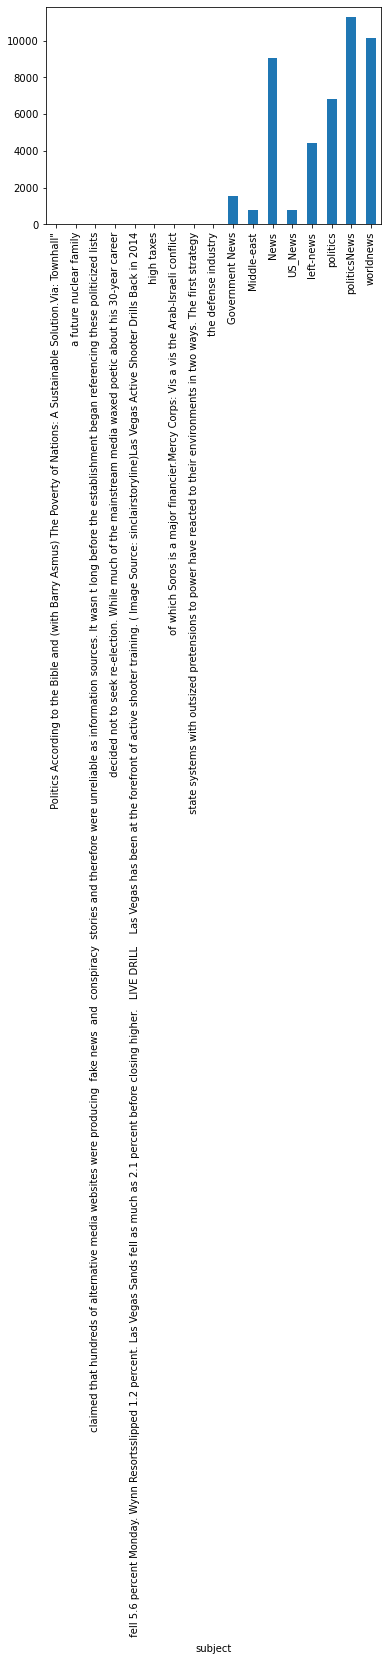

In [22]:
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [23]:
df = df[df['subject'].str.contains('of which Soros is a major financier.Mercy Corps: Vis a vis the Arab-Israeli conflict')== False]

In [24]:
df = df[df['subject'].str.contains('claimed that hundreds of alternative media websites were producing  fake news  and  conspiracy  stories and therefore were unreliable as information sources. It wasn t long before the establishment began referencing these politicized lists')== False]

In [25]:
df = df[df['subject'].str.contains('state systems with outsized pretensions to power have reacted to their environments in two ways. The first strategy')== False]

In [26]:
df = df[df['subject'].str.contains('fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014')== False]

C:\Users\admin\AppData\Local\Temp\ipykernel_7836\2980401333.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['subject'].str.contains('fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014')== False]


In [27]:
df = df[df['subject'].str.contains('and so is Mr. Katzenbach', ' a future nuclear family')== False]

In [28]:
df = df[df['subject'].str.contains('Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"')== False]

C:\Users\admin\AppData\Local\Temp\ipykernel_7836\901266348.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['subject'].str.contains('Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"')== False]


In [29]:
df = df[df['subject'].str.contains('high taxes')== False]

In [30]:
df = df[df['subject'].str.contains('decided not to seek re-election. While much of the mainstream media waxed poetic about his 30-year career')== False]

In [31]:
df = df[df['subject'].str.contains('the defense industry')== False]

subject
 Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"                                                                                                                                                                               1
 a future nuclear family                                                                                                                                                                                                                                                                            2
 fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014        2
Government News                                                                                               

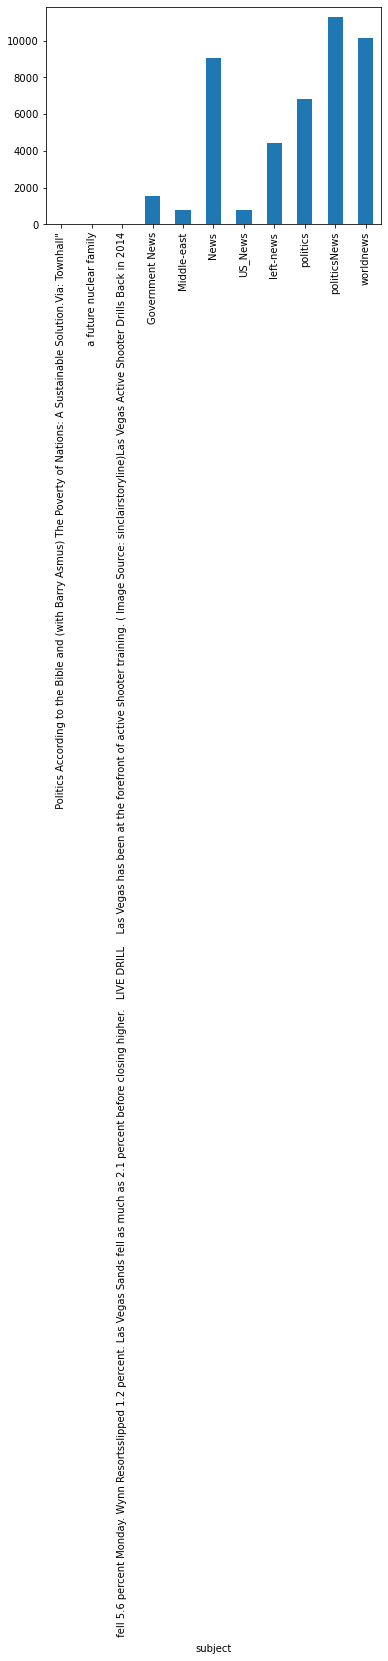

In [32]:
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [33]:
df = df[df['subject'].str.contains('a future nuclear family')== False]

subject
 Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"                                                                                                                                                                               1
 fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014        2
Government News                                                                                                                                                                                                                                                                                  1570
Middle-east                                                                                                   

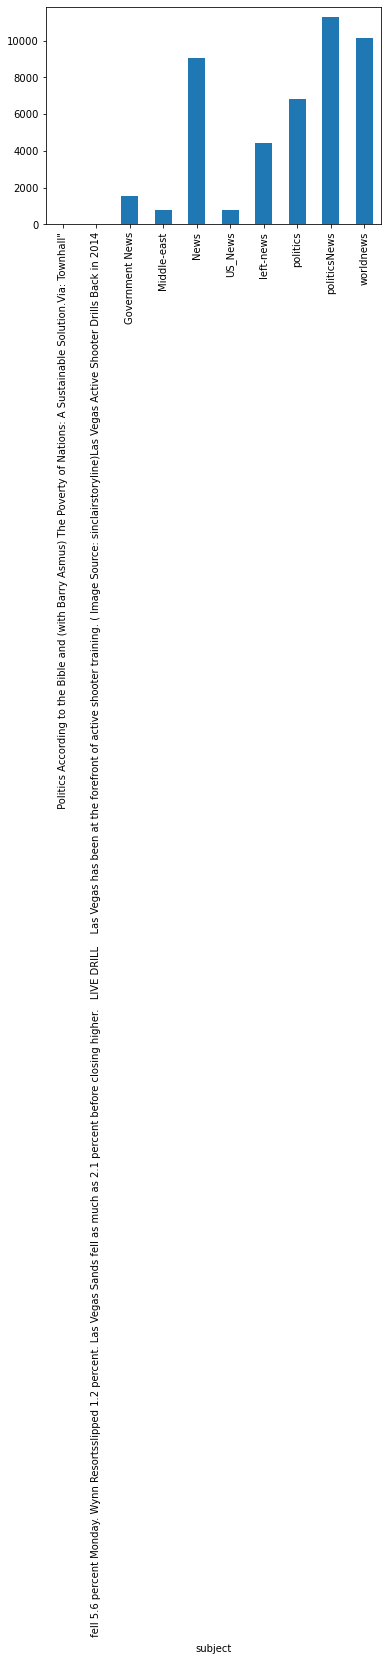

In [34]:
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [35]:
df = df[df['subject'].str.contains('Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"')== False]

C:\Users\admin\AppData\Local\Temp\ipykernel_7836\901266348.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['subject'].str.contains('Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"')== False]


In [36]:
df = df[df['subject'].str.contains('fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014')==False]

C:\Users\admin\AppData\Local\Temp\ipykernel_7836\2790126174.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['subject'].str.contains('fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014')==False]


In [37]:
df = df.dropna(how = 'any', axis = 0)

subject
 Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"                                                                                                                                                                               1
 fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014        2
Government News                                                                                                                                                                                                                                                                                  1570
Middle-east                                                                                                   

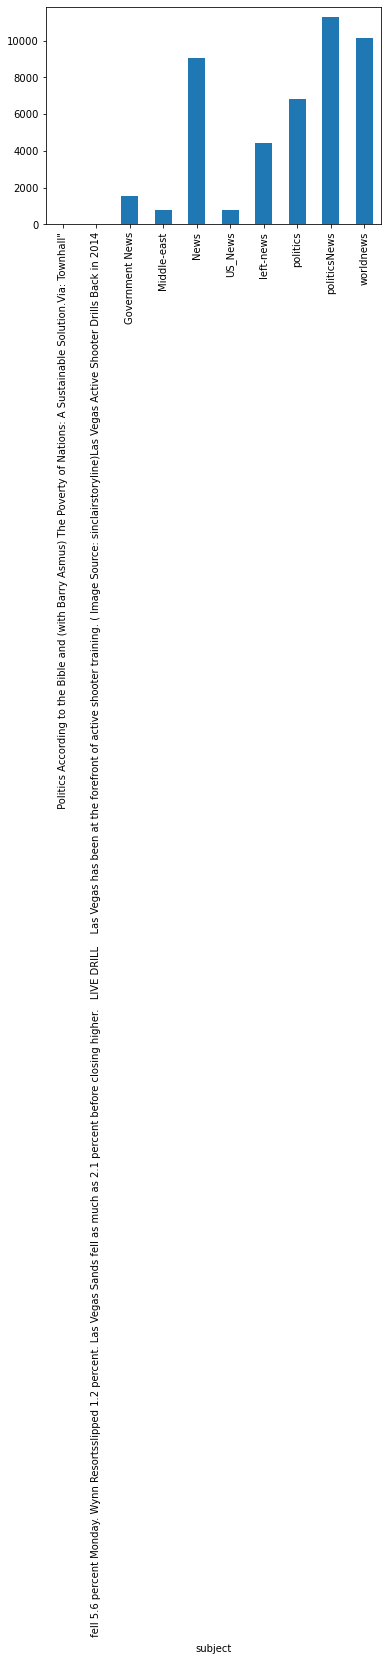

In [38]:
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23502
true    21417
Name: text, dtype: int64


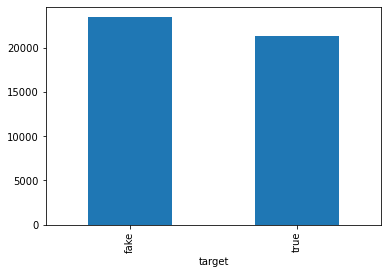

In [39]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

# Modeling

In [42]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Preparing the Data

In [43]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# Naive Bayes

In [44]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipeNB = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

modelNB = pipeNB.fit(X_train, y_train)
prediction = modelNB.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 93.9%


Confusion matrix, without normalization


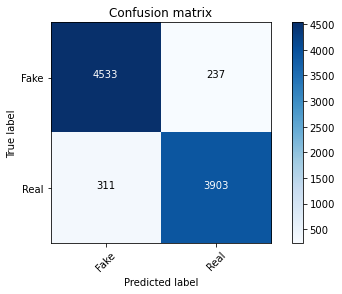

In [45]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Logistic Regression

In [46]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipeLR = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
modelLR = pipeLR.fit(X_train, y_train)

# Accuracy
prediction = modelLR.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.8%


Confusion matrix, without normalization


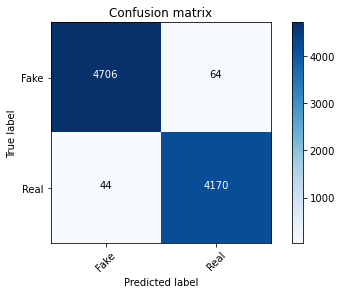

In [47]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipeDT = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
modelDT = pipeDT.fit(X_train, y_train)

# Accuracy
prediction = modelDT.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.59%


Confusion matrix, without normalization


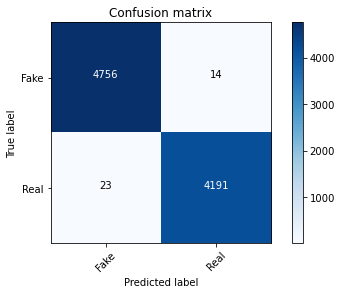

In [49]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

pipeRF = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

modelRF = pipeRF.fit(X_train, y_train)
prediction = modelRF.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.8%


Confusion matrix, without normalization


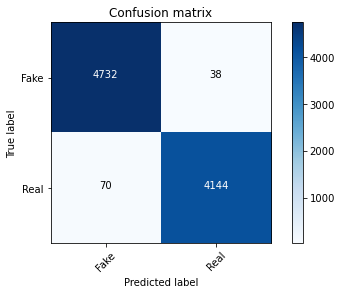

In [51]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# SVM

In [52]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

modelSVM = pipe.fit(X_train, y_train)
prediction = modelSVM.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.49%


Confusion matrix, without normalization


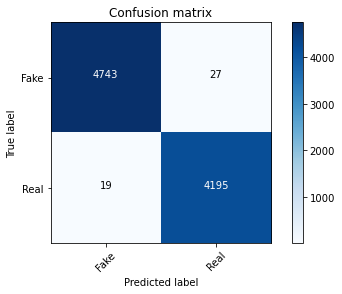

In [53]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Comparing Different Models

([<matplotlib.axis.YTick at 0x1ff07d7bca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

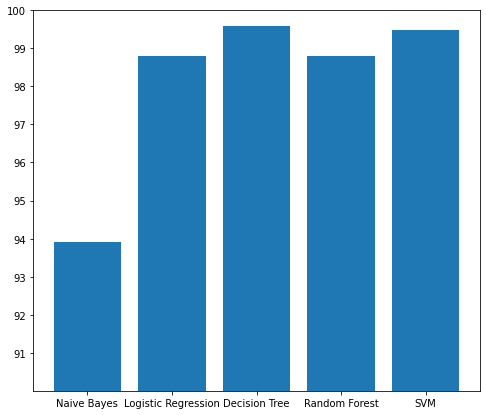

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

In [55]:
def output_lable(n):
    if n=='fake':
        return "Fake News"
    elif n=='true':
        return "Not A Fake News"
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_x_test = new_def_test["text"].apply(lower_case)
#     new_x_test = new_x_test.apply(punctuation_removal)
#     new_x_test = new_x_test.apply(stopwords_removal)
    pred_LR = modelLR.predict(new_x_test)
    pred_DTC = modelDT.predict(new_x_test)
    pred_RFC = modelRF.predict(new_x_test)
    pred_SVM = modelSVM.predict(new_x_test)
    pred_NB = modelNB.predict(new_x_test)
    
    return print("\n\nLR Prediction: {} \nDTC Prediction: {} \nRFC Prediction: {} \nNB Prediction: {} \nSVM Prediction: {}".format(output_lable(pred_LR[0]),output_lable(pred_DTC[0]),output_lable(pred_RFC[0]),output_lable(pred_NB[0],output_lable(pred_SVM[0]))))

In [56]:
X_test.head()


30464    WASHINGTON (Reuters) - President Barack Obama ...
41926    Tune in to the Alternate Current Radio Network...
8877     ANKARA (Reuters) - A Turkish court has sentenc...
3798     James O Keefe of Project Veritas has used his ...
39671    WARSAW (Reuters) - Polish lawmakers from the r...
Name: text, dtype: object

In [57]:
news = str(input())
manual_testing(news)

Alabama official to certify Senator-elect Jones today despite challenge: CNN,"WASHINGTON (Reuters) - Alabama Secretary of State John Merrill said he will certify Democratic Senator-elect Doug Jones as winner on Thursday despite opponent Roy Moore’s challenge, in a phone call on CNN. Moore, a conservative who had faced allegations of groping teenage girls when he was in his 30s, filed a court challenge late on Wednesday to the outcome of a U.S. Senate election he unexpectedly lost. ",politicsNews,28-Dec-17 Jones certified U.S. Senate winner despite Moore challenge,"(Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state’s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win

### The End.....